## Dataset Preparation

In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

2024-04-03 20:39:37.166620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 20:39:40.244853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
p = Path("/workspaces/Machine_Learning_in_Python/Projects/Image Classification/images")
dirs = p.glob("*")
labels = []
image_data = []
labels_dict = {'cat':0,'dog':1, 'horse':2,'human': 3}

for folder_name in dirs:
    # print(folder_name)
    label = str(folder_name).split("/")[-1][:-1]
    # print(label)
    for img_path in folder_name.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(32,32))
        img_arr = image.img_to_array(img)
        image_data.append(img_arr)
        labels.append(labels_dict[label])
        # print(img_arr)

In [10]:
print(len(image_data))
print(len(labels))

808
808


In [11]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


In [12]:
# Shuffle the Data
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

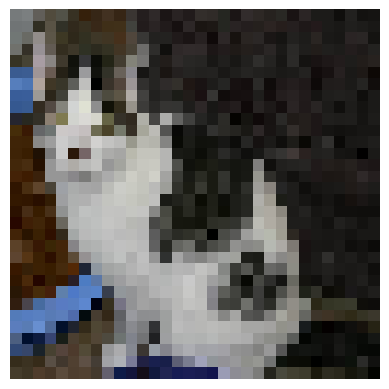

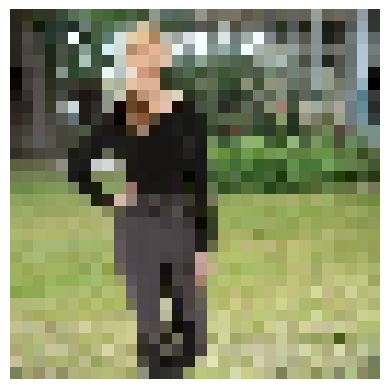

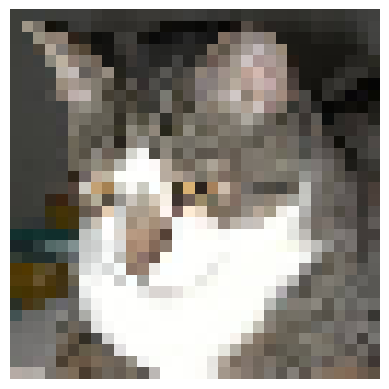

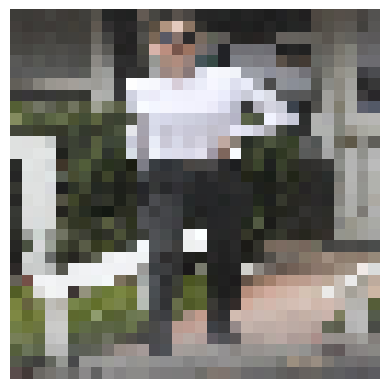

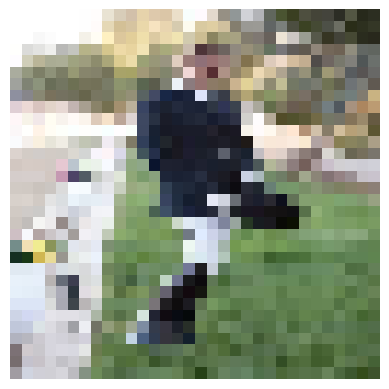

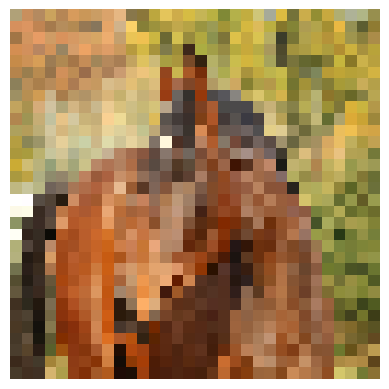

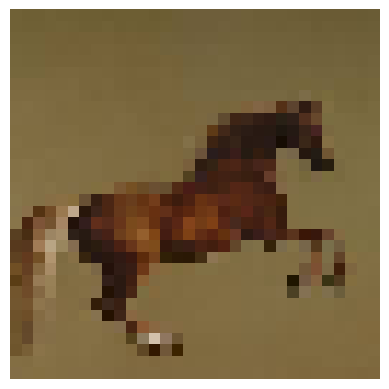

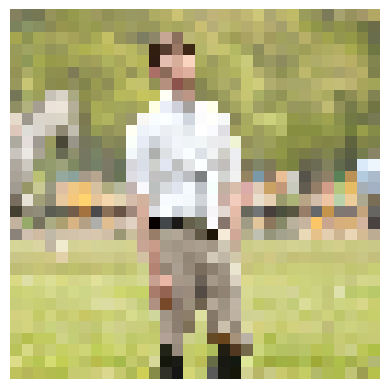

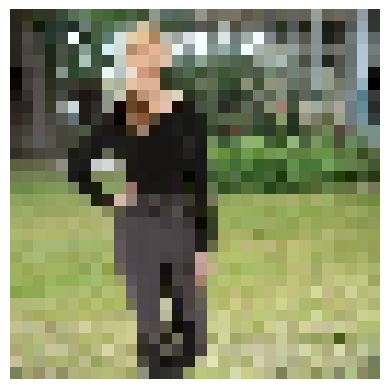

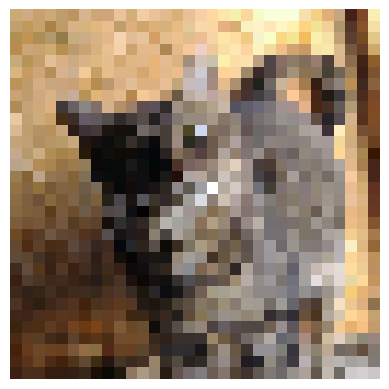

In [13]:
def drawIMG(img):
    from matplotlib import pyplot as plt
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    return


for i in range(10):
    drawIMG(image_data[i])

## SVM Classifier

In [14]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    

## We need to convert data for One for One classification!

In [15]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)
